In [156]:
import pandas as pd
from sodapy import Socrata
import datetime
import gmaps
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import gmaps.datasets


In [93]:
speed_df = pd.read_csv('Speed_Camera_Violations.csv')
speed_df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,10318 S INDIANAPOLIS,CHI120,06/10/2019,83,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",47.0,21202.0,49.0,705.0,47.0
1,1110 S PULASKI RD,CHI163,06/10/2019,23,1.149841e+06,1.894931e+06,41.867603,-87.725383,"(41.86760272243294, -87.7253827433152)",36.0,21572.0,30.0,98.0,14.0
2,1111 N HUMBOLDT,CHI010,06/10/2019,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11144 S VINCENNES,CHI023,06/10/2019,34,1.166994e+06,1.830711e+06,41.691025,-87.664248,"(41.69102545584918, -87.6642476900556)",33.0,22212.0,74.0,378.0,42.0
4,11153 S VINCENNES,CHI022,06/10/2019,10,1.167029e+06,1.830594e+06,41.690702,-87.664122,"(41.690701951255015, -87.66412238501842)",45.0,22212.0,74.0,378.0,22.0


In [3]:

speed_df['VIOLATION DATE'] = pd.to_datetime(speed_df['VIOLATION DATE'])


In [8]:
# filtered by date
speed_18_19 = speed_df[(speed_df['VIOLATION DATE']>=datetime.date(2018,1,1)) & (speed_df['VIOLATION DATE']<=datetime.date(2019,6,10))]

C:\Users\consi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [173]:
#got rid of NaN
speed_cameras = speed_18_19.dropna()
speed_camera = speed_cameras.groupby(['CAMERA ID'])
speed_count = speed_camera.count()
speed_count.head()

,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
CAMERA ID,,,,,,,,,,,,,
CHI003,516,516,516,516,516,516,516,516,516,516,516,516,516
CHI004,522,522,522,522,522,522,522,522,522,522,522,522,522
CHI005,516,516,516,516,516,516,516,516,516,516,516,516,516
CHI007,517,517,517,517,517,517,517,517,517,517,517,517,517
CHI008,518,518,518,518,518,518,518,518,518,518,518,518,518


In [73]:
speed_lon= speed_camera['LONGITUDE'].mean()
speed_lat= speed_camera['LATITUDE'].mean()
violations = speed_camera['VIOLATIONS'].count()

In [81]:
new_df = pd.DataFrame({
    'Longitude':speed_lon,
    'Latitude':speed_lat,
    'Number of Violations':violations
})
new_dff = new_df.dropna()
speed_counts = speed_count.dropna()

,Longitude,Latitude,Number of Violations
CAMERA ID,,,
CHI003,-87.731670,41.975605,516
CHI004,-87.728347,41.974333,522
CHI005,-87.677349,41.823189,516
CHI007,-87.684721,41.823564,517
CHI008,-87.718168,41.877071,518


In [137]:
#map info
locations = new_dff[["Latitude","Longitude"]]
rating =speed_count["VIOLATIONS"].astype(float)
chicago_center = (41.8781,-87.6298)

In [57]:
#map size
figure_layout = {
    'width': '1000px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

In [171]:
#map
fig = gmaps.figure(layout = figure_layout,center = chicago_center, zoom_level = 9.5, map_type = 'HYBRID')

heat_layer = gmaps.heatmap_layer(locations, weights=rating, dissipating = False, max_intensity = .5, point_radius =.01)

point_layers = gmaps.symbol_layer(locations, fill_color='green', stroke_color='green', scale=2)

#london_congestion_zone_path = gmaps.datasets.load_dataset('chicago_zone')
#london_congestion_zone_path[:2]

#chicago_zone = gmaps.Polygon(
    #london_congestion_zone_path,
    #stroke_color='blue',
    #fill_color='blue')

#drawing = gmaps.drawing_layer(
    #features=[chicago_zone],
    #show_controls=False)

#fig.add_layer(heat_layer)

fig.add_layer(point_layers)

fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

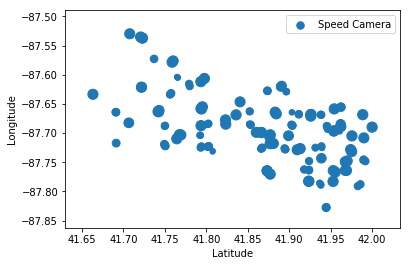

In [87]:
new_dff.plot(kind = 'scatter', x = 'Latitude', y = 'Longitude', s = violations/5, label = 'Speed Camera')

In [89]:
#trying zip codes because less data points
zip_code_df = speed_cameras 

In [90]:
zip_group = zip_code_df.groupby(['Zip Codes'])

In [107]:
zip_count = zip_group['VIOLATIONS'].count()
zip_lon= zip_group['LONGITUDE'].mean()
zip_lat= zip_group['LATITUDE'].mean()

In [109]:
zip_df = pd.DataFrame({
    'Latitude': zip_lat,
    'Longitude':zip_lon,
    'Number of Violations':zip_count
})

In [118]:
#map info
z_locations = zip_df[["Latitude","Longitude"]]
z_rating =zip_df["Number of Violations"].astype(float)

In [119]:
#map size
figure_layouts = {
    'width': '1000px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

In [149]:
#map
fig = gmaps.figure(layout = figure_layouts, map_type = 'HYBRID', center = chicago_center, zoom_level = 10)

heat_layer = gmaps.heatmap_layer(z_locations, weights=z_rating, dissipating = False, max_intensity = .1, point_radius =.008)

point_layer = gmaps.symbol_layer(z_locations, fill_color='green', stroke_color='green', scale=2)

#fig.add_layer(heat_layer)

fig.add_layer(point_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

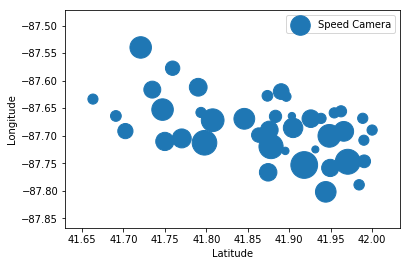

In [125]:
zip_df.plot(kind = 'scatter', x = 'Latitude', y = 'Longitude', s = zip_count/5, label = 'Speed Camera')

In [167]:
date_group = speed_cameras.groupby(['VIOLATION DATE'])

In [170]:
date_count = date_group.count()
date_count.sort_values(by='VIOLATIONS', ascending = False)

,ADDRESS,CAMERA ID,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
VIOLATION DATE,,,,,,,,,,,,,
2019-05-23,151,151,151,151,151,151,151,151,151,151,151,151,151
2018-12-10,150,150,150,150,150,150,150,150,150,150,150,150,150
2019-05-22,150,150,150,150,150,150,150,150,150,150,150,150,150
2019-04-12,149,149,149,149,149,149,149,149,149,149,149,149,149
2019-02-21,149,149,149,149,149,149,149,149,149,149,149,149,149
2019-05-08,149,149,149,149,149,149,149,149,149,149,149,149,149
2019-02-27,149,149,149,149,149,149,149,149,149,149,149,149,149
2019-05-20,148,148,148,148,148,148,148,148,148,148,148,148,148
2019-04-26,148,148,148,148,148,148,148,148,148,148,148,148,148
